(sec:pandas_4)=
# 판다스 활용: 통계

**주요 내용**

`Series`와 `DataFrame` 객체를로부터 기초 통계 자료를 추출하는 방식을 다룬다.

* 합, 평균, 표준편차
* 상관관계, 공분산
* 중복값 처리

**기본 설정**

`pandas` 라이브러리는 보통 `pd` 라는 별칭으로 사용된다.

In [1]:
import pandas as pd
import numpy as np

랜덤 시드, 어레이 내부에 사용되는 부동소수점 정확도, 도표 크기 지정 옵션 등은 이전과 동일하다.

In [2]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

`Series`와 `DataFrame`을 표로 보여줄 때 사용되는 행의 수를 20으로 지정한다. 
기본 값은 60이다.

In [3]:
pd.options.display.max_rows # 원래 60이 기본.

60

기본값을 20으로 변경한다.

In [4]:
pd.set_option("display.max_rows", 20)

## 데이터 탐색

데이터 탐색을 위한 주요 메서드를 살펴 본다.

- `head()`
- `tail()`
- `info()`

설명을 위해 아래 데이터프레임을 이용한다.

In [5]:
dict = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada', 'NY', 'NY', 'NY'],
         'year': [str(num) for num in [2000, 2001, 2002, 2001, 2002, 2003, 2002, 2003, 2004]],
         'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2, 8.3, 8.4, 8.5],
         'debt':np.linspace(0, 1, 9)}

frame = pd.DataFrame(dict, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six', 'seven', 'eight', 'nine'])
frame

,year,state,pop,debt
one,2000,Ohio,1.5,0.000
two,2001,Ohio,1.7,0.125
three,2002,Ohio,3.6,0.250
four,2001,Nevada,2.4,0.375
five,2002,Nevada,2.9,0.500
six,2003,Nevada,3.2,0.625
seven,2002,NY,8.3,0.750
eight,2003,NY,8.4,0.875
nine,2004,NY,8.5,1.000


**`head()` 메서드**

`head()` 메서드는 지정된 크기만큼의 행을 보여준다. 
인자를 지정하지 않으면 처음 5개의 행을 보여준다.

In [6]:
frame.head(3)

,year,state,pop,debt
one,2000,Ohio,1.5,0.000
two,2001,Ohio,1.7,0.125
three,2002,Ohio,3.6,0.250


In [7]:
frame.head()

,year,state,pop,debt
one,2000,Ohio,1.5,0.000
two,2001,Ohio,1.7,0.125
three,2002,Ohio,3.6,0.250
four,2001,Nevada,2.4,0.375
five,2002,Nevada,2.9,0.500


**`tail()` 메서드**

`tail()` 메서드는 지정된 크기만큼의 행을 뒤에서부터 보여준다. 
인자를 지정하지 않으면 뒤에서부터 5개의 행을 보여준다.

In [8]:
frame.tail(3)

,year,state,pop,debt
seven,2002,NY,8.3,0.750
eight,2003,NY,8.4,0.875
nine,2004,NY,8.5,1.000


In [9]:
frame.tail()

,year,state,pop,debt
five,2002,Nevada,2.9,0.500
six,2003,Nevada,3.2,0.625
seven,2002,NY,8.3,0.750
eight,2003,NY,8.4,0.875
nine,2004,NY,8.5,1.000


**`info()` 메서드**

열(columns) 별로 결측치가 아닌 항목의 수와 자료형을 확인해준다.

- `9 non-null`: 결측치가 아닌 항목이 9개 있음을 의미함.
- `object`: 일반적으로 문자열 자료형을 가리킴.

In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, one to nine
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    9 non-null      object 
 1   state   9 non-null      object 
 2   pop     9 non-null      float64
 3   debt    9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 360.0+ bytes


## 합, 평균, 표준편차

기초 통계에서 사용되는 주요 메서드들의 활용법을 살펴본다.

* `sum()`
* `mean()`
* `std()`
* `idxmax()`/`idxmin()`
* `cumsum()`
* `describe()`

기본적으로 열 단위로 작동하며, 결측치는 행 또는 열의 모든 값이 결측치가 아니라면 기본적으로 무시된다.
행 단위로 작동하게 하려면 축을 `axis=1` 또는 `axis='columns`로 지정하고,
결측치를 무시하지 않으려면 `skipna=False`로 지정한다.

In [11]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


* `sum()` 메서드: 행/열 단위 합 계산

In [12]:
df.sum()

one    9.25
two   -5.80
dtype: float64

결측치를 무시하지 않으면, 결측치가 포함된 행/렬에 대한 계산은 하지 않는다.

In [13]:
df.sum(skipna=False)

one   NaN
two   NaN
dtype: float64

In [14]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

시리즈는 하나의 열을 갖는 데이터프레임처럼 작동한다.

In [15]:
df['one']

a    1.40
b    7.10
c     NaN
d    0.75
Name: one, dtype: float64

In [16]:
df['one'].sum()

9.25

* `mean()` 메서드: 평균값 계산

In [17]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

In [18]:
df.mean(axis='columns')

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

결측치를 무시하지 않으면, 결측치가 포함된 행/렬에 대한 계산은 하지 않는다.

In [19]:
df.mean(skipna=False)

one   NaN
two   NaN
dtype: float64

In [20]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

시리즈의 경우도 동일하게 작동한다.

In [21]:
df['one'].mean()

3.0833333333333335

In [22]:
df['one'].mean(skipna=False)

nan

* `std()` 메서드: 표준편차 계산

In [23]:
df.std()

one    3.493685
two    2.262742
dtype: float64

In [24]:
df.std(axis='columns')

a         NaN
b    8.202439
c         NaN
d    1.449569
dtype: float64

In [25]:
df.std(skipna=False)

one   NaN
two   NaN
dtype: float64

In [26]:
df.std(axis='columns', skipna=False)

a         NaN
b    8.202439
c         NaN
d    1.449569
dtype: float64

* `idxmax()`/`idxmin()`: 최댓값/최솟값을 갖는 인덱스 확인

아래 코드는 열별 최댓값을 갖는 인덱스를 찾아준다.

In [27]:
df.idxmax()

one    b
two    d
dtype: object

* `cumsum()`: 누적 합 계산

In [28]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [29]:
df.cumsum(skipna=False)

,one,two
a,1.4,NaN
b,8.5,NaN
c,NaN,NaN
d,NaN,NaN


* `describe()`: 요약 통계 보여주기

수치형 데이터의 경우 평균값, 표준편차, 사분위수 등의 통계 정보를 요약해서 보여준다.

In [30]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


## 상관관계와 공분산

금융 사이트에서 구한 4 개 회사의 주가(price)와 거래량(volume)을 담고 있는 두 개의 데이터를 이용하여
상관계수와 공분산을 계산해본다.
이를 위해 먼저 바이너리 파일 두 개를 다운로드해서 지정된 하위 디렉토리에 저장한다.

* 파일 저장 디렉토리 지정 및 생성

In [31]:
from pathlib import Path

data_path = Path() / "examples"

data_path.mkdir(parents=True, exist_ok=True)

* 특정 서버에서 파일 다운로드 함수

In [32]:
import requests

# 파일 서버 기본 주소
base_url = "https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/"
    
def myWget(filename):
    # 다운로드 대상 파일 경로
    file_url = base_url + filename
    
    # 저장 경로와 파일명
    target_path = data_path / filename

    data = requests.get(file_url)
    
    with open(target_path, 'wb') as f:
        f.write(data.content)

두 개의 픽클 파일 다운로드한다.
- pkl 파일: 판다스에서 제공하는 객체를 `to_pickle()` 메서드를 이용하여 
    컴퓨터에 파일로 저장할 때 사용되는 바이너리 파일.

In [33]:
myWget("yahoo_price.pkl")

In [34]:
myWget("yahoo_volume.pkl")

다운로드한 두 개의 데이터를 불러온다.

- `read_pickle()`: 저장된 pkl 파일을 파이썬으로 불러오는 함수

아래 코드는 일별 주가 데이터를 불러온다.
2010년 1월 4일부터 2016년 10월 21일까지의 데이터 1714개를 담고 있다.

In [35]:
price = pd.read_pickle('examples/yahoo_price.pkl')
price

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571
...,...,...,...,...
2016-10-17,117.550003,779.960022,154.770004,57.220001
2016-10-18,117.470001,795.260010,150.720001,57.660000
2016-10-19,117.120003,801.500000,151.259995,57.529999


아래 코드는 동일 회사, 동일 날짜의 1일 거래량(volume) 담고 있는 데이터를 불러온다.

In [36]:
volume = pd.read_pickle('examples/yahoo_volume.pkl')
volume

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,123432400,3927000,6155300,38409100
2010-01-05,150476200,6031900,6841400,49749600
2010-01-06,138040000,7987100,5605300,58182400
2010-01-07,119282800,12876600,5840600,50559700
2010-01-08,111902700,9483900,4197200,51197400
...,...,...,...,...
2016-10-17,23624900,1089500,5890400,23830000
2016-10-18,24553500,1995600,12770600,19149500
2016-10-19,20034600,116600,4632900,22878400


주가의 일단위 변화율을 알아보기 위해 퍼센트 변화율을 확인해보자.

**참고:** 증권분야에서 return은 이익율을 의미한다.

In [37]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


**`corr()`/`cov()` 메서드**

상관계수와 공분산 모두 두 확률변수 사이의 선형관계를 보여주며
차이점은 다음과 같다.

- 공분산: 두 확률변수 $X, Y$ 사이의 선형관계를 계량화 함. 
    양수/음수 여부에 따라 양 또는 음의 선형관계이며,
    절댓값이 클 수록 강한 선형관계임.
    다만, 사용되는 확률변수의 척도(scale)에 많은 영향을 받음.
    따라서 보통 정규화한 값인 상관계수를 사용함.

$$
\begin{align*}
Cov(X, Y) & = E((X-\mu_X)(Y-\mu_Y))\\[2ex]
\mu_X & = E(X) = \dfrac{\sum X}{n}\\[1.5ex]
\mu_Y & = E(Y) = \dfrac{\sum Y}{n}
\end{align*}
$$

- 상관계수: 두 확률변수 사이의 선형관계를 -1과 1 사이의 값으로 표현.
    양수/음수 여부에 따라 양 또는 음의 선형관계이며,
    절댓값이 1에 가까울 수록 강한 선형관계임.

$$
\begin{align*}
\rho & = \frac{Cov(X, Y)}{\sigma_X\cdot \sigma_Y}\\[2ex]
\sigma_X & = \sqrt{Var(X)}\\[1.5ex]
\sigma_X & = \sqrt{Var(X)}\\[1.5ex]
Var(X) & = \dfrac{\sum (X-\mu_X)^2}{n}\\[1.5ex]
Var(Y) & = \dfrac{\sum (X-\mu_Y)^2}{n}
\end{align*}
$$    

'MSFT'와 'IBM' 사이의 상관계수는 다음과 같다.

In [38]:
returns['MSFT'].corr(returns['IBM'])

0.4997636114415114

'MSFT'와 'IBM' 사이의 공분산은 다음과 같다.

In [39]:
returns['MSFT'].cov(returns['IBM'])

8.870655479703546e-05

전체 회사를 대상으로 하는 상관계수와 공분산을 계산할 수도 있다.

In [40]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


In [41]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


## 중복과 빈도

**`unique()` 메서드**

시리즈에서 사용된 값을 중복 없이 확인하려면 `unique()` 메서드를 이용한다.
`set()` 함수와 유사하게 작동하며, 넘파이 어레이를 반환한다.

In [42]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [43]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

**`value_counts()` 메서드**

값들의 빈도수를 확인하기 위해 사용한다.

In [44]:
obj.value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

## 실전 예제: 붓꽃 데이터셋 분석

아래 링크에 아이리스(붓꽃) 데이터(`iris.data`)가 저장되어 있다.

In [45]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

`iris.data` 파일에는 아래 형식의 데이터가 150개 들어 있다. 

```python
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...
```

포함된 데이터 특성들 사이의 구분자, 
즉 열 구분자는 쉼표가 사용되었으며 각 열의 라벨은 지정되어 있지 않다.
따라서 판다스의 `read_csv()` 함수의 인자를 아래처럼 지정해서 해당 파일을
데이터프레임으로 불러온다.

In [46]:
iris = pd.read_csv(url, sep=',', header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


하나의 데이터에 사용된 값들은 하나의 아이리스(붓꽃)에 대한 꽃잎, 꽃받침과 관련된 특성(features)과 품종을 나타내며,
보다 구체적으로 아래 순서를 따른다.

```
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종
```

열 라벨을 언급한대로 수정한다.

In [47]:
columns = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']

열 라벨의 영문명은 다음과 같다.

In [48]:
columns_eng = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Variety']

열 라벨을 한글명으로 지정해보자.

In [49]:
iris.columns = columns
iris

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


포함된 5개의 특성(열)별 정보는 다음과 같다.

In [50]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   150 non-null    float64
 1   꽃받침너비   150 non-null    float64
 2   꽃잎길이    150 non-null    float64
 3   꽃잎너비    150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


수치형 특성들의 간략한 통계 정보는 다음과 같다.
즉 품종 특성은 제외된다.

In [51]:
iris.describe()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


수치형 특성 각각의 의미는 아래 사진에서 확인할 수 있다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book//images/iris_petal-sepal.png" style="width:450px;"></div></p>

**품종 확인**

품종은 다음과 같이 확인된다.

In [52]:
varieties = iris.품종.unique()
varieties

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

150개의 데이터는 아래 세 개의 품종으로 구분된다.

```
'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
```

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book//images/iris01.png" style="width:650px;"></div></p>

품종별로 각각 50개의 데이터 샘플이 포함되어 있다.

In [53]:
iris.품종.value_counts()

품종
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

품종명을 단순화시키기 위해 유니버설 함수를 정의한다.

In [54]:
shortening = np.vectorize(lambda x: x.replace('Iris-', '').capitalize())

`shortening()` 함수는 `Iris-` 접두사를 제거한 후에 대문자로 시작하는 품종명을 생성한다.

In [55]:
varieties = shortening(varieties)
varieties

array(['Setosa', 'Versicolor', 'Virginica'], dtype='<U10')

품종을 문자열이 아닌 0, 1, 2로 구분하면 데이터프레임을 보다 유용하게 활용할 수 있다.
이를 위해 아래 사전을 이용한다.

In [56]:
varieties_dict = {item[1]:item[0] for item in enumerate(iris.품종.unique())}
varieties_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

`map()` 메서드를 이용하여 품종을 0, 1, 2로 변환한다.

In [57]:
iris.loc[:, '품종'] = iris.품종.map(lambda x: varieties_dict[x])

In [58]:
iris

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**산점도**

아래 코드는 꽃받침의 기리와 너비를 이용한 산점도를 그린다.

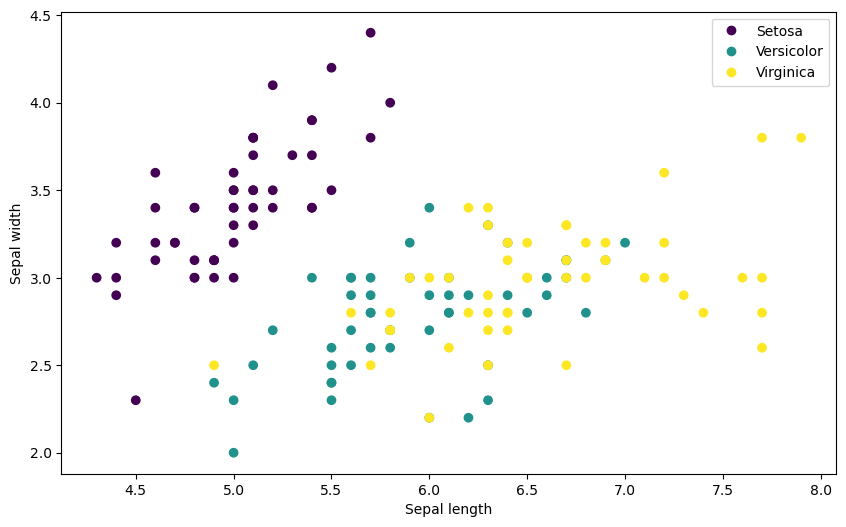

In [59]:
import matplotlib.pyplot as plt

scatter = plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=iris.iloc[:, 4])
plt.xlabel(columns_eng[0])
plt.ylabel(columns_eng[1])

handles, _ = scatter.legend_elements()

plt.legend(handles, varieties)
plt.show()

반면에 아래 코드는 꽃잎의 길이와 너비를 이용한 산점도를 그린다.

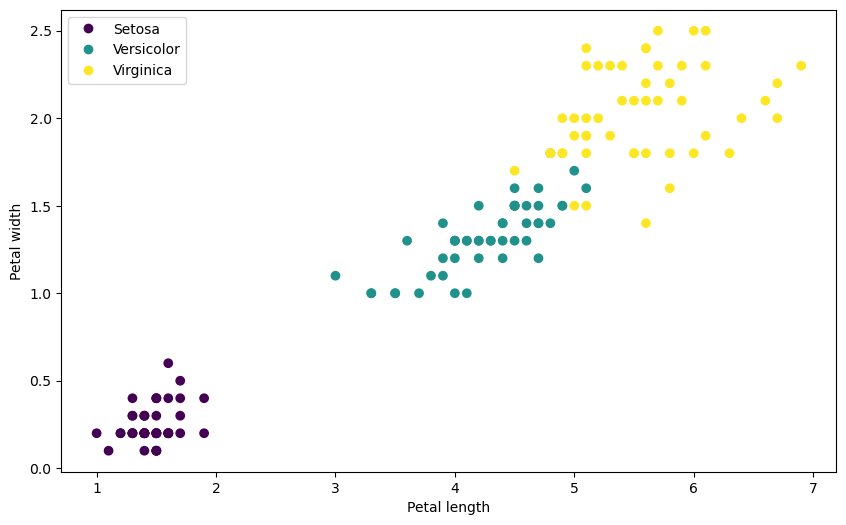

In [60]:
import matplotlib.pyplot as plt

scatter = plt.scatter(iris.iloc[:, 2], iris.iloc[:, 3], c=iris.iloc[:, 4])
plt.xlabel(columns_eng[2])
plt.ylabel(columns_eng[3])

handles, _ = scatter.legend_elements()

plt.legend(handles, varieties)
plt.show()

**예제 1**

꽃받침 길이(0번 열)와 꽃잎 길이(2번 열) 사이의 피어슨 상관계수를 계산하라.

답:

데이터프레임의 `corr()` 메서드는 모든 특성들 사이의 피어슨 상관계수로 이루어진 데이터프레임을 반환환다.

In [61]:
iris_corr = iris.iloc[:, :4].corr()
iris_corr

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
꽃받침길이,1.000000,-0.109369,0.871754,0.817954
꽃받침너비,-0.109369,1.000000,-0.420516,-0.356544
꽃잎길이,0.871754,-0.420516,1.000000,0.962757
꽃잎너비,0.817954,-0.356544,0.962757,1.000000


따라서 '꽃받침길이'와 다른 특성들 사이의 상관계수를 역순으로 정렬하면 다음과 같다.

In [62]:
iris_corr['꽃받침길이'].sort_values(ascending=False)

꽃받침길이    1.000000
꽃잎길이     0.871754
꽃잎너비     0.817954
꽃받침너비   -0.109369
Name: 꽃받침길이, dtype: float64

따라서 '꽃받침길이'와 '꽃잎길이' 사이의 상관계수가 가장 높다.

**예제 2**

버시컬러 품종에 해당하는 데이터만 `iris`로부터 추출하라. 

답:

버시컬러 품종은 1에 해당하기에 다음 부울 마스크를 이용한다.

In [63]:
mask = iris.iloc[:, -1] == 1
mask

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: 품종, Length: 150, dtype: bool

In [64]:
iris_versicolor = iris[mask]
iris_versicolor

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


**예제 3**

각 특성별 평균값, 중위수, 표준편차를 구하라.

답:

수치형 데이터의 평균값, 중위수, 표준편차는 `describe()` 메서드로 확인된다.
중위수는 `50%` 라벨의 행에 위치한다.

In [65]:
iris.describe()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**예제 4**

세 개의 품종 각각에 대해 꽃받침너비(1번 열)의 평균값을 계산하여 아래 모양의  
시리즈(Series)를 가리키는 `iris_mean_sepal_width` 변수를 선언하라.

|                 | |
| ---:            | ---:             |
| Iris-setosa     | 3.418            |
| Iris-versicolor | 2.770            |
| Iris-virginica  | 2.974            |


답:

아래 코드는 품종별로 꽃받침너비의 평균값을 계산해서 리스트에 추가한다.

In [66]:
iris_mean_sepal_width = []

for variety in range(3):
    mask = iris.iloc[:, 4] == variety
    mean_0 = iris[mask]['꽃받침너비'].mean()
    iris_mean_sepal_width.append(mean_0)

시리즈 생성을 위해 `index`와 `name` 키워드를 인자를 지정한다.

In [67]:
iris_mean_sepal_width = pd.Series(iris_mean_sepal_width, index=varieties, name='평균꽃받침너비')
iris_mean_sepal_width

Setosa        3.418
Versicolor    2.770
Virginica     2.974
Name: 평균꽃받침너비, dtype: float64

**예제 5** 

`iris`에 포함된 모든 수치형 특성을 정규화<font size='2'>normalization</font>를 이용하여 모두 0과 1사이의 값으로 변환하라. 

힌트: 정규화에 대한 설명은 [정규화/표준화](https://codingalzi.github.io/handson-ml3/end2end_ml_project.html?highlight=정규화#minmaxscaler-standardscaler)을 참고하라.

답:

수치형 특성만을 가리키는 `iris_features`를 선언한다.

In [68]:
iris_features = iris.iloc[:, :4]
iris_features

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


아니면 다음과 같이 `drop()` 메서드를 이용할 수도 있다.

In [69]:
iris_features = iris.drop('품종', axis=1)
iris_features

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


`min()`, `max()` 등의 데이터프레임 메서드는 기본적으로 축을 0으로 지정해서 열 단위로 작동한다.

In [70]:
iris_features.min()

꽃받침길이    4.3
꽃받침너비    2.0
꽃잎길이     1.0
꽃잎너비     0.1
dtype: float64

In [71]:
iris_features.min(axis=0)

꽃받침길이    4.3
꽃받침너비    2.0
꽃잎길이     1.0
꽃잎너비     0.1
dtype: float64

사칙연산을 활용하여 열별로 정규화된 데이터프레임을 다음과 같이 생성한다.

In [72]:
iris_normalized = (iris_features - iris_features.min())/(iris_features.max() - iris_features.min())

iris_normalized

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


**예제 6**

`iris`에 사용된 모든 값을 특성 별로 표준화<font size='2'>standardization</font>하라. 

힌트: 표준화에 대한 설명은 [정규화/표준화](https://codingalzi.github.io/handson-ml3/end2end_ml_project.html?highlight=표준화#minmaxscaler-standardscaler)을 참고하라.

답:

`mean()`, `std()` 메서드 또한 열별로 계산된다.

In [73]:
iris_features.mean()

꽃받침길이    5.843333
꽃받침너비    3.054000
꽃잎길이     3.758667
꽃잎너비     1.198667
dtype: float64

In [74]:
iris_features.std()

꽃받침길이    0.828066
꽃받침너비    0.433594
꽃잎길이     1.764420
꽃잎너비     0.763161
dtype: float64

사칙연산을 활용하여 열별로 표준화된 데이터프레임을 다음과 같이 생성한다.

In [75]:
iris_standardized = (iris_features - iris_features.mean()) / iris_features.std()

iris_standardized[:5]

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


## 연습문제 

참고: [(실습) 판다스 활용: 통계 기초](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-pandas_4.ipynb)